In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%config Completer.use_jedi = False
%matplotlib inline

In [2]:
df = pd.read_csv('Ready_for_pca.csv', index_col=0)

In [3]:
df.T

,1,2,3,4,5,6,7,8,9,10,...,9990,9991,9992,9993,9994,9995,9996,9998,9999,10000
Interaction,aa90260b-4141-4a24-8e36-b04ce1f4f77b,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,344d114c-3736-4be5-98f7-c72c281e2d35,abfa2b40-2d43-4994-b15a-989b8c79e311,68a861fd-0d20-4e51-a587-8a90407ee574,2b451d12-6c2b-4cea-a295-ba1d6bced078,6630d501-838c-4be4-a59c-6f58c814ed6a,70ddaa89-b726-49dc-9022-2d655e4c7936,05a49ee3-8fd5-453a-a5f3-82b6cd986856,86f17e4d-2c24-4b70-a6ec-dddf0609dbaa,...,e8f40610-af75-4bfd-baf8-0b15918b04ed,89d0d064-307e-4f21-a5b4-6ec1137c8bfc,24f1d865-3d58-495f-9dc9-b5927a1fd40a,ce7abedd-6437-4609-9123-8a4a8234381e,3f3c716b-fd57-40f2-8a58-d944efcf1fd5,c60df12b-a50b-4397-ae57-98381a0d3960,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,e8307ddf-9a01-4fff-bc59-4742e03fd24f,3775ccfc-0052-4107-81ae-9657f81ecdf3,9de5fb6e-bd33-4995-aec8-f01d0172a499
City,Point Baker,West Branch,Yamhill,Del Mar,Needville,Fort Valley,Pioneer,Oklahoma City,Saint Cloud,Cincinnati,...,Little Eagle,Gilmore City,Smyrna,Haubstadt,Machias,West Kill,Mount Holly,Mobeetie,Carrollton,Clarkesville
State,AK,MI,OR,CA,TX,GA,TN,OK,FL,OH,...,SD,IA,NY,IN,ME,NY,VT,TX,GA,GA
County,Prince of Wales-Hyder,Ogemaw,Yamhill,San Diego,Fort Bend,Peach,Scott,Oklahoma,Osceola,Hamilton,...,Corson,Humboldt,Chenango,Gibson,Washington,Greene,Rutland,Wheeler,Carroll,Habersham
Zip,99927,48661,97148,92014,77461,31030,37847,73109,34771,45237,...,57639,50541,13464,47639,4654,12492,5758,79061,30117,30523
Lat,56.251,44.32893,45.35589,32.96687,29.38012,32.57032,36.4342,35.43313,28.27646,39.19296,...,45.7036,42.71548,42.68582,38.17985,44.77104,42.18491,43.43391,35.52039,33.58016,34.70783
Lng,-133.37571,-84.2408,-123.24657,-117.24798,-95.80673,-83.8904,-84.27892,-97.52463,-81.16273,-84.4523,...,-100.7717,-94.44913,-75.61754,-87.57497,-67.55341,-74.33574,-72.78734,-100.4418,-85.13241,-83.53648
Population,38,10446,3735,13863,11352,17701,2535,23144,17351,20193,...,338,836,1378,4261,3209,210,640,406,35575,12230
Area,Urban,Urban,Urban,Suburban,Suburban,Urban,Suburban,Suburban,Suburban,Rural,...,Rural,Rural,Rural,Suburban,Rural,Urban,Rural,Rural,Urban,Urban
Timezone,America/Sitka,America/Detroit,America/Los_Angeles,America/Los_Angeles,America/Chicago,America/New_York,America/New_York,America/Chicago,America/New_York,America/New_York,...,America/Denver,America/Chicago,America/New_York,America/Chicago,America/New_York,America/New_York,America/New_York,America/Chicago,America/New_York,America/New_York


In [4]:
df['Churn'].replace({
    'No': 0,
    'Yes': 1
}, inplace=True)

# PCA works best with continous varibles 

In [5]:
pca_df = df.loc[:,['Age', 'Income', 'Outage_sec_perweek', 'Tenure',
          'MonthlyCharge', 'Bandwidth_GB_Year']]

In [6]:
pca_df.columns

Index(['Age', 'Income', 'Outage_sec_perweek', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year'],
      dtype='object')

In [7]:
standard_scaler = StandardScaler()
pca_df = standard_scaler.fit_transform(pca_df)

In [8]:
pca_df

array([[ 0.82364381, -0.41661389, -0.96141438, -1.09566271, -0.06032433,
        -1.20122096],
       [-1.45734354, -0.74776818,  0.41451893, -1.31935559,  1.58776043,
        -1.25119787],
       [-0.17776527, -0.05602088, -0.06821322, -0.74027316, -0.33714857,
        -0.64612559],
       ...,
       [-0.01086376, -0.05602088, -1.54401126,  0.13349416, -0.13475186,
         0.36959586],
       [-0.78973748, -0.99102814,  0.43141634,  1.45512645,  1.81090468,
         1.48403815],
       [-1.4017097 , -0.05602088,  0.58568428,  1.14789204,  1.02124303,
         1.18921963]])

In [9]:
normalised_df = pd.DataFrame(data=pca_df,
                            columns=['Age', 'Income', 'Outage_sec_perweek', 'Tenure',
                                    'Monthly_Charge', 'Bandwidth_GB'])

In [10]:
normalised_df

,Age,Income,Outage_sec_perweek,Tenure,Monthly_Charge,Bandwidth_GB
0,0.823644,-0.416614,-0.961414,-1.095663,-0.060324,-1.201221
1,-1.457344,-0.747768,0.414519,-1.319356,1.587760,-1.251198
2,-0.177765,-0.056021,-0.068213,-0.740273,-0.337149,-0.646126
3,-0.289033,-0.882000,1.285507,-0.687390,-1.240526,-0.593099
4,1.658151,0.139342,-0.418966,-1.298954,-0.537210,-1.506740
...,...,...,...,...,...,...
9556,-0.400301,0.927006,-0.923728,-0.245355,-0.700255,0.749152
9557,-0.010864,0.895103,-0.335712,1.340144,-0.328196,1.504692
9558,-0.010864,-0.056021,-1.544011,0.133494,-0.134752,0.369596
9559,-0.789737,-0.991028,0.431416,1.455126,1.810905,1.484038


In [11]:
pca = PCA()
pca.fit(normalised_df)

PCA()

In [12]:
loadings = pd.DataFrame(pca.components_, columns=normalised_df.columns)

In [13]:
loadings

,Age,Income,Outage_sec_perweek,Tenure,Monthly_Charge,Bandwidth_GB
0,-0.007860,-0.001307,0.019197,0.705303,0.044823,0.707182
1,-0.043443,-0.103884,0.700801,-0.060045,0.701837,-0.004297
2,-0.796420,0.583372,0.128385,-0.015921,-0.092441,0.010479
3,0.584060,0.803207,0.050707,0.007982,0.105043,-0.008019
4,-0.147761,0.061173,-0.699592,-0.037998,0.695287,0.011290
5,0.028394,0.000163,-0.005100,-0.705110,-0.049124,0.706806


In [14]:
def abline(slope, intercept, ax):
    '''
    Calculates coordinates of a lined based on slope and intercept 
    '''
    x_vals = np.array(ax.get_xlim())
    return (x_vals, intercept + slope * x_vals)
    

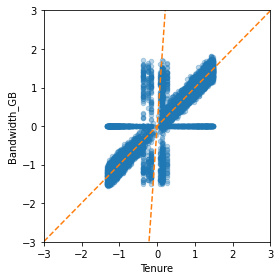

In [15]:
ax = normalised_df.plot.scatter(x='Tenure', y='Bandwidth_GB', alpha=0.3,
                               figsize = (4,4))

ax.set_xlim(-3,3)
ax.set_ylim(-3,3)

ax.plot(*abline(loadings.loc[0, 'Tenure'] / loadings.loc[0, 'Bandwidth_GB'],
               intercept=0, ax=ax),
       c= 'C1', ls= '--')

ax.plot(*abline(loadings.loc[1, 'Tenure'] / loadings.loc[1, 'Bandwidth_GB'],
               0, ax),
       ls = '--', c = 'C1')

plt.tight_layout()
plt.show()


In [16]:
normalised_df

,Age,Income,Outage_sec_perweek,Tenure,Monthly_Charge,Bandwidth_GB
0,0.823644,-0.416614,-0.961414,-1.095663,-0.060324,-1.201221
1,-1.457344,-0.747768,0.414519,-1.319356,1.587760,-1.251198
2,-0.177765,-0.056021,-0.068213,-0.740273,-0.337149,-0.646126
3,-0.289033,-0.882000,1.285507,-0.687390,-1.240526,-0.593099
4,1.658151,0.139342,-0.418966,-1.298954,-0.537210,-1.506740
...,...,...,...,...,...,...
9556,-0.400301,0.927006,-0.923728,-0.245355,-0.700255,0.749152
9557,-0.010864,0.895103,-0.335712,1.340144,-0.328196,1.504692
9558,-0.010864,-0.056021,-1.544011,0.133494,-0.134752,0.369596
9559,-0.789737,-0.991028,0.431416,1.455126,1.810905,1.484038


# interpreting PCA

In [17]:
sp_pca = PCA()
sp_pca.fit(normalised_df)

PCA()

In [18]:
sp_pca.explained_variance_ratio_ * 100

array([31.55474807, 18.35518632, 16.77995968, 16.58852647, 14.95848572,
        1.76309374])

##  5 components expressed 99 percent 
#### We can consider eliminating PCA5

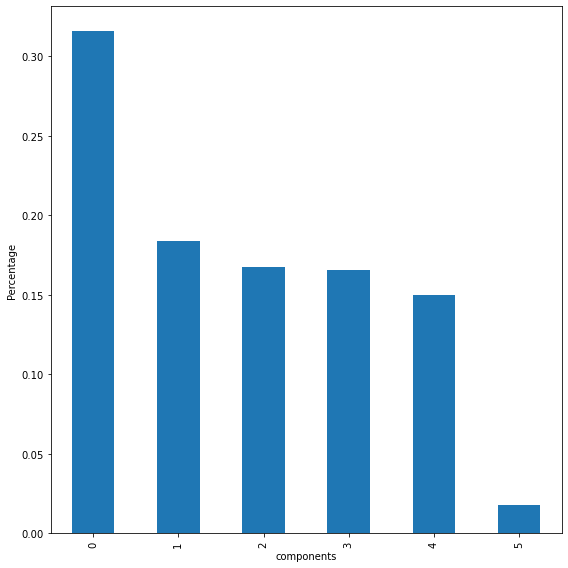

In [19]:
explained_variance = pd.DataFrame(sp_pca.explained_variance_ratio_)
ax = explained_variance.head(10).plot.bar(legend=False, figsize=(8,8))
ax.set_xlabel('components')
ax.set_ylabel('Percentage')

plt.tight_layout()
plt.show()

In [20]:
data_pca = PCA(n_components=5)
data_pca_trans = data_pca.fit_transform(normalised_df)

In [21]:
data_pca_df = pd.DataFrame(data=data_pca_trans,
                          columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PC5'])
data_pca_df

,PCA1,PCA2,PCA3,PCA4,PC5
0,-1.649345,-0.637649,-1.012006,0.092230,0.511539
1,-1.723813,1.630433,0.638769,-1.264485,1.019557
2,-0.993996,-0.223659,0.136319,-0.188423,-0.143019
3,-0.931749,0.178242,0.000101,-0.943095,-1.753676
4,-2.027033,-0.672685,-1.238534,1.004420,-0.284548
...,...,...,...,...,...
9556,0.309552,-1.206211,0.817493,0.382415,0.292993
9557,1.987059,-0.645056,0.512500,0.659741,0.029098
9558,0.320004,-1.179930,-0.208052,-0.145687,0.983766
9559,2.172745,1.616807,-0.068805,-1.045442,0.974813


In [22]:
# reset index to avoid adding an extra row

In [23]:
df['Churn']

1        0
2        1
3        0
4        0
5        1
        ..
9995     0
9996     0
9998     0
9999     0
10000    0
Name: Churn, Length: 9561, dtype: int64

In [24]:
df.reset_index(drop=True, inplace=True)

In [25]:
print('explained variation per principal components: {}' .format(data_pca.explained_variance_ratio_ * 100))

explained variation per principal components: [31.55474807 18.35518632 16.77995968 16.58852647 14.95848572]


In [26]:
final_df = pd.concat([data_pca_df, df[['Churn']]], join = 'outer', axis = 1)

In [27]:
final_df

,PCA1,PCA2,PCA3,PCA4,PC5,Churn
0,-1.649345,-0.637649,-1.012006,0.092230,0.511539,0
1,-1.723813,1.630433,0.638769,-1.264485,1.019557,1
2,-0.993996,-0.223659,0.136319,-0.188423,-0.143019,0
3,-0.931749,0.178242,0.000101,-0.943095,-1.753676,0
4,-2.027033,-0.672685,-1.238534,1.004420,-0.284548,1
...,...,...,...,...,...,...
9556,0.309552,-1.206211,0.817493,0.382415,0.292993,0
9557,1.987059,-0.645056,0.512500,0.659741,0.029098,0
9558,0.320004,-1.179930,-0.208052,-0.145687,0.983766,0
9559,2.172745,1.616807,-0.068805,-1.045442,0.974813,0


/Users/cristophernimatuj/Desktop/Master_folder/jupyter/Jupyter_notebook/env/lib/python3.8/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/cristophernimatuj/Desktop/Master_folder/jupyter/Jupyter_notebook/env/lib/python3.8/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


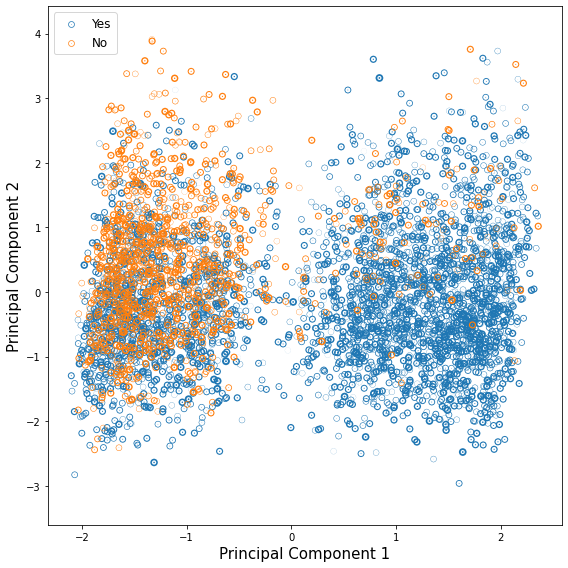

In [28]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)

targets = [0, 1]
colors = ["#41bbc5", "#5da13b", 'red']
for target, color in zip(targets, colors):
    indicesToKeep = final_df['Churn'] == target
    plt.scatter(final_df.loc[indicesToKeep, 'PCA1'],
                final_df.loc[indicesToKeep, 'PCA2'],
                 final_df.loc[indicesToKeep, 'PCA3'], lw=6
)
ax.legend(['Yes','No'], fontsize='large')
plt.tight_layout()
plt.show()

In [29]:
from yellowbrick.features import PCA

/Users/cristophernimatuj/Desktop/Master_folder/jupyter/Jupyter_notebook/env/lib/python3.8/site-packages/yellowbrick/features/pca.py:448: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


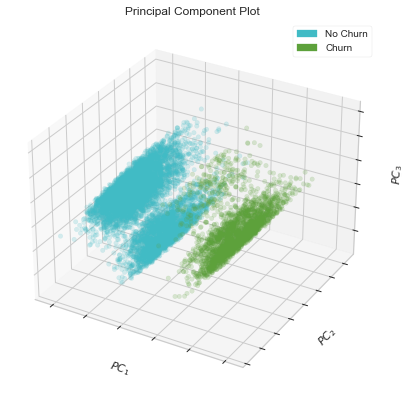

<Axes3DSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [30]:
classes = ['No Churn' '', 'Churn']
vis_3 = PCA(scale=True, projection=3,
           random_state=2020,
           colors=["#41bbc5", "#5da13b",], alpha= .2
           , classes=classes)


vis_3.fit_transform(final_df, final_df.Churn)
plt.tight_layout()
vis_3.show()


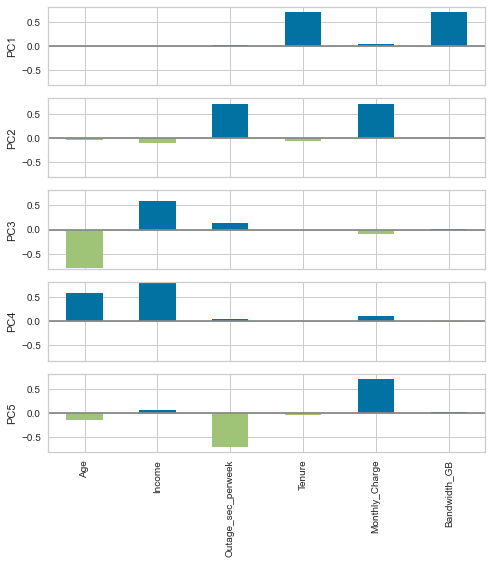

In [31]:
maxPC = 1.01 * np.max(np.max(np.abs(loadings.loc[0:5, :])))

f, axes = plt.subplots(5, 1, figsize=(7, 8), sharex=True)

for i, ax in enumerate(axes):
    pc_loadings = loadings.loc[i, :]
    colors = ['C0' if l > 0 else 'C1' for l in pc_loadings]
    ax.axhline(color='#888888')
    pc_loadings.plot.bar(ax=ax, color=colors)
    ax.set_ylabel(f'PC{i+1}')
    ax.set_ylim(-maxPC, maxPC)

plt.tight_layout()
plt.show()

In [32]:
df

,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,...,item5,item6,item7,item8,AgeIs_missing,Techieis_missing,Phoneis_missing,TechSupportis_missing,Tenure_is_missing,Bandwidth_GB_YearIs_missing
0,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,...,4,4,3,4,False,False,False,False,False,False
1,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,...,4,3,4,4,False,False,False,False,False,False
2,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,...,4,3,3,3,False,False,False,False,False,False
3,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,...,5,4,3,3,False,False,False,False,False,False
4,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,...,4,4,4,5,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9556,c60df12b-a50b-4397-ae57-98381a0d3960,West Kill,NY,Greene,12492,42.18491,-74.33574,210,Urban,America/New_York,...,3,3,4,4,False,False,False,False,True,False
9557,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,640,Rural,America/New_York,...,4,3,2,3,True,True,True,False,False,False
9558,e8307ddf-9a01-4fff-bc59-4742e03fd24f,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,406,Rural,America/Chicago,...,4,4,4,5,True,False,False,False,True,False
9559,3775ccfc-0052-4107-81ae-9657f81ecdf3,Carrollton,GA,Carroll,30117,33.58016,-85.13241,35575,Urban,America/New_York,...,3,3,5,4,False,False,False,False,False,False
